<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/EmbeddingGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Util Functions

In [0]:
from sklearn.decomposition import PCA
from seaborn import set_style, regplot
from pandas import DataFrame

def plot_graph(vectors:List[List[int]], labels:List[str]) -> None:
  """ 
  a labelled 2D plot of graph embeddings 
  (pca used to reduce vector dimensions) 
  """

  pca = PCA(n_components=2)  
  set_style("whitegrid")
  
  data = DataFrame(
    data = pca.fit_transform(vectors), 
    columns = ['x_coordinate','y_coordinate']
  )
  graph=regplot(
      data=data, 
      x="x_coordinate", 
      y="y_coordinate", 
      fit_reg=False, 
      marker="+"
  )

  adjusted_x_coordinates = []
  offsets = {}
  for x in data['x_coordinate']:
    x = round(x,2)
    if x in offsets:
      offsets[x] += .1
    else:
      offsets[x] = 0
    adjusted_x_coordinates.append(x + offsets[x])

  [
   graph.text(*xylabel) for xylabel in zip(
      adjusted_x_coordinates,
      data['y_coordinate'],
      labels
    )
  ]


In [35]:
from typing import List, Set
def one_hot_encoding(indexes:Set[int], vector_length:int) -> List[int]:
  return list(map(lambda index: int(index in indexes), range(vector_length)))

one_hot_encoding(indexes={2,5},vector_length=10)

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]

In [0]:
from networkx import Graph, draw

def create_graph(connections:List[int]) -> Graph:
  graph = Graph()
  for start_node,end_nodes in enumerate(connections):
    if not isinstance(end_nodes,list):
      end_nodes = [end_nodes]
    for end_node in end_nodes:
      graph.add_edge(start_node,end_node)
    
  draw(graph, with_labels=True)
  return graph

# An Example Graph

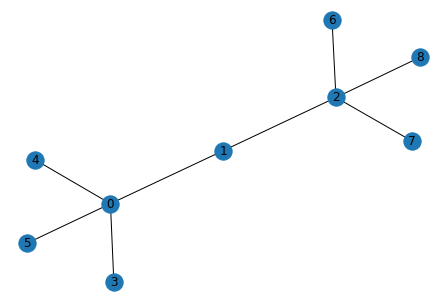

In [224]:
graph1 = create_graph(connections = [0, 0, 1, 0, 0, 0, 2, 2, 2])

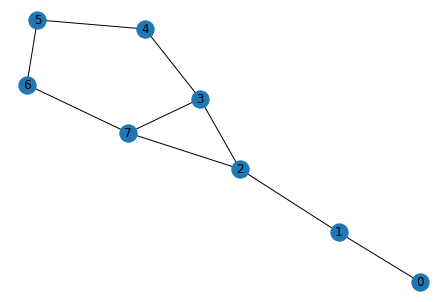

In [230]:
graph2 = create_graph(connections = [1,2,3,4,5,6,7,[2,3]])

# Graph Embedding (Edges)

In [0]:
def create_vectors_from_edges(graph:Graph) -> List[List[int]]:
  return [
    [
      int(node in edge) for edge in graph.edges
    ]  for node in graph.nodes
  ]

In [234]:
create_vectors_from_edges(graph1)

[[1, 1, 1, 1, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1]]

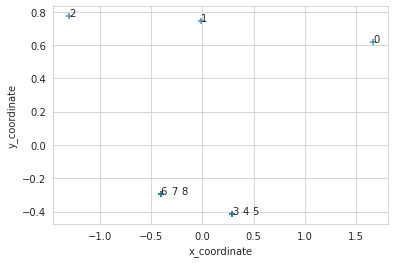

In [236]:
plot_graph(
  vectors = create_vectors_from_edges(graph1),
  labels = map(str,range(len(graph1.nodes)))
)

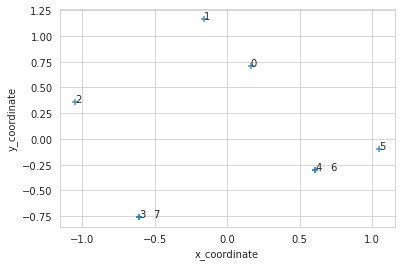

In [237]:
plot_graph(
  vectors = create_vectors_from_edges(graph2),
  labels = map(str,range(len(graph2.nodes)))
)

# Graph Embedding (Adjacent Nodes)

In [0]:
def create_vectors_from_adjacent_nodes(graph:Graph) -> List[List[int]]:
  adjacent_nodes = [
    set(graph[node_id].keys()) | {node_id} for node_id in graph.nodes
  ]
  return list(
    map(
      lambda neighbours: one_hot_encoding(
          indexes=neighbours, 
          vector_length=len(graph.nodes)
      ), 
      adjacent_nodes
    )
  )

In [239]:
create_vectors_from_adjacent_nodes(graph1)

[[1, 1, 0, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1]]

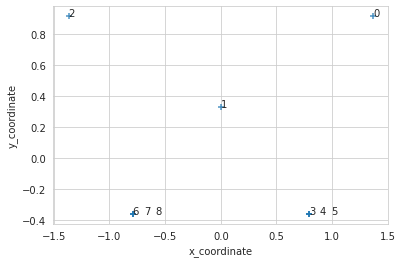

In [240]:
plot_graph(
  vectors = create_vectors_from_adjacent_nodes(graph1),
  labels = map(str,range(len(graph1.nodes)))
)

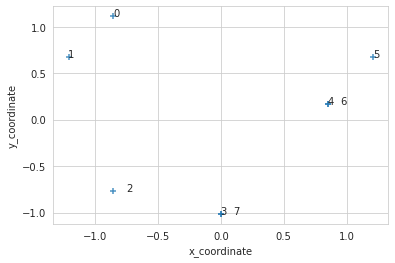

In [241]:
plot_graph(
  vectors = create_vectors_from_adjacent_nodes(graph2),
  labels = map(str,range(len(graph2.nodes)))
)

# Graph Embedding (All Nodes)

In [0]:
from networkx import shortest_path_length
from math import exp

def sigmoid(x:float) -> float:
  return 1 / (1 + exp(-x))

def create_vectors_from_all_nodes(graph:Graph) -> List[List[int]]:
  return [
    [
      sigmoid(shortest_path_length(graph, node_start, node_end)) for node_end in graph.nodes
    ] for node_start in graph.nodes
  ]

In [204]:
create_vectors_from_all_nodes(graph2)

[[0.5,
  0.7310585786300049,
  0.8807970779778823,
  0.9525741268224334,
  0.9820137900379085,
  0.9820137900379085,
  0.9525741268224334],
 [0.7310585786300049,
  0.5,
  0.7310585786300049,
  0.8807970779778823,
  0.9525741268224334,
  0.9525741268224334,
  0.8807970779778823],
 [0.8807970779778823,
  0.7310585786300049,
  0.5,
  0.7310585786300049,
  0.8807970779778823,
  0.8807970779778823,
  0.7310585786300049],
 [0.9525741268224334,
  0.8807970779778823,
  0.7310585786300049,
  0.5,
  0.7310585786300049,
  0.8807970779778823,
  0.8807970779778823],
 [0.9820137900379085,
  0.9525741268224334,
  0.8807970779778823,
  0.7310585786300049,
  0.5,
  0.7310585786300049,
  0.8807970779778823],
 [0.9820137900379085,
  0.9525741268224334,
  0.8807970779778823,
  0.8807970779778823,
  0.7310585786300049,
  0.5,
  0.7310585786300049],
 [0.9525741268224334,
  0.8807970779778823,
  0.7310585786300049,
  0.8807970779778823,
  0.8807970779778823,
  0.7310585786300049,
  0.5]]

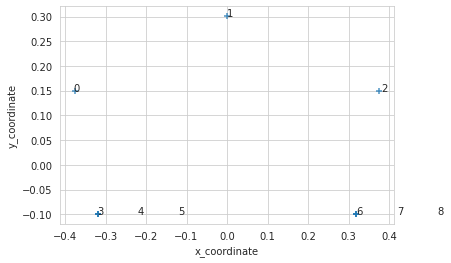

In [242]:
plot_graph(
  vectors = create_vectors_from_all_nodes(graph1),
  labels = map(str,range(len(graph1.nodes)))
)

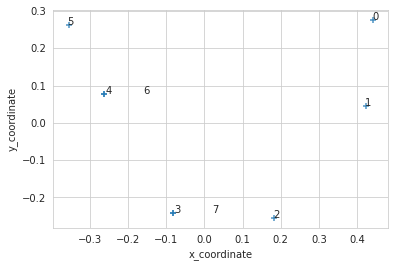

In [243]:
plot_graph(
  vectors = create_vectors_from_all_nodes(graph2),
  labels = map(str,range(len(graph2.nodes)))
)

# Graph Embedding (Random-Walk)

In [0]:
from random import choice

def random_walk(node:int,steps:int, graph:Graph) -> List[str]:
  path = []
  for _ in range(steps):
    path.append(str(node))
    adjacent_nodes = list(graph[node])
    node = choice(adjacent_nodes)
  return path

In [167]:
def generate_training_set(graph:Graph, random_walk_repeats:int, random_walk_path_length:int) -> List[List[str]]:
  return [
    random_walk(
      node = node,
      steps = random_walk_path_length,
      graph = graph
    ) for node in graph.nodes for _ in range(random_walk_repeats)
  ]
generate_training_set(graph1,2,10)

[['0', '1', '2', '7', '2', '7', '2', '7', '2', '8'],
 ['0', '4', '0', '1', '0', '0', '4', '0', '5', '0'],
 ['1', '2', '6', '2', '6', '2', '8', '2', '8', '2'],
 ['1', '0', '0', '4', '0', '4', '0', '0', '4', '0'],
 ['2', '7', '2', '1', '2', '8', '2', '8', '2', '1'],
 ['2', '8', '2', '8', '2', '6', '2', '8', '2', '1'],
 ['3', '0', '0', '4', '0', '1', '2', '7', '2', '7'],
 ['3', '0', '3', '0', '4', '0', '5', '0', '5', '0'],
 ['4', '0', '3', '0', '4', '0', '5', '0', '4', '0'],
 ['4', '0', '1', '2', '8', '2', '8', '2', '6', '2'],
 ['5', '0', '3', '0', '1', '0', '3', '0', '0', '4'],
 ['5', '0', '4', '0', '5', '0', '0', '3', '0', '4'],
 ['6', '2', '8', '2', '6', '2', '1', '2', '7', '2'],
 ['6', '2', '6', '2', '1', '2', '8', '2', '7', '2'],
 ['7', '2', '8', '2', '8', '2', '6', '2', '1', '2'],
 ['7', '2', '1', '0', '0', '1', '0', '5', '0', '0'],
 ['8', '2', '1', '2', '7', '2', '1', '2', '6', '2'],
 ['8', '2', '1', '2', '7', '2', '1', '0', '3', '0']]

In [0]:
from gensim.models import Word2Vec

def create_vectors_from_random_walks(graph:Graph) -> List[List[float]]:
  skipgram_model = Word2Vec()
  Word2Vec(window = 4, sg = 1, hs = 0,negative = 10, alpha=.03, min_alpha=.0007, seed = 14)
  training_set_for_graph = generate_training_set(graph,30,40)
  skipgram_model.build_vocab(training_set_for_graph, progress_per=2)
  skipgram_model.train(
    training_set_for_graph, 
    total_examples = skipgram_model.corpus_count, 
    epochs=20, 
    report_delay=1
  )
  return skipgram_model[list(map(str,graph.nodes))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


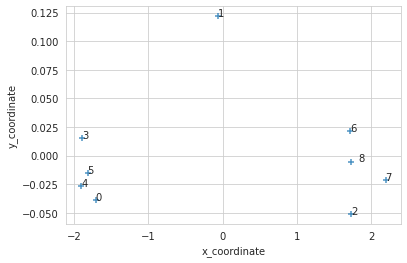

In [250]:
plot_graph(
  vectors = create_vectors_from_random_walks(graph1),
  labels = map(str,range(len(graph1.nodes)))
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


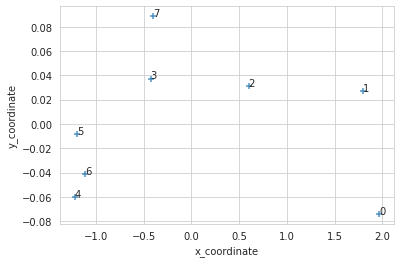

In [251]:
plot_graph(
  vectors = create_vectors_from_random_walks(graph2),
  labels = map(str,range(len(graph2.nodes)))
)

### Node2Vec

In [216]:
!pip3 install node2vec

In [0]:
from node2vec import Node2Vec

def create_vectors_node2vec(graph:Graph) -> List[List[float]]:
  node2vec = Node2Vec(graph, dimensions=64, walk_length=30, num_walks=200, workers=4)  
  model = node2vec.fit(window=10, min_count=1, batch_words=4) 
  return model[list(map(str,graph.nodes))]

Computing transition probabilities: 100%|██████████| 9/9 [00:00<00:00, 2874.78it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


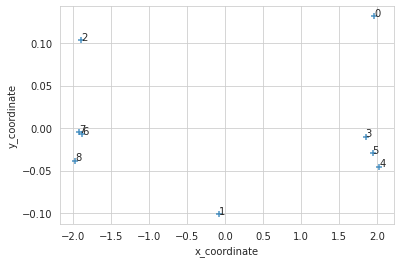

In [252]:
plot_graph(
  vectors = create_vectors_node2vec(graph1),
  labels = map(str,range(len(graph1.nodes)))
)

Computing transition probabilities: 100%|██████████| 8/8 [00:00<00:00, 4155.86it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


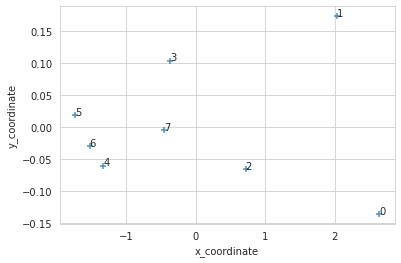

In [254]:
plot_graph(
  vectors = create_vectors_node2vec(graph2),
  labels = map(str,range(len(graph2.nodes)))
)